In [1]:
import pandas as pd
import numpy as np
import sklearn as sc

In [2]:
from sklearn.metrics import log_loss as lg
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import recall_score as rec
from sklearn.metrics import precision_score as pre
from sklearn.metrics import accuracy_score

In [3]:
accuracy = []
model = []

In [4]:
df_train = pd.read_csv("phishing_data_small.csv")
df_test = pd.read_csv("phishing_data_large.csv")
print(df_train.shape)
print(df_test.shape)

(58645, 112)
(88647, 112)


In [5]:
X_train = df_train.iloc[:, 0:111]
X_train.shape

(58645, 111)

In [6]:
Y_train = df_train.iloc[:, 111:112]
Y_train.shape

(58645, 1)

In [7]:
X_test = df_test.iloc[:, 0:111]
X_test.shape

(88647, 111)

In [8]:
Y_test = df_test.iloc[:, 111:112]
Y_test.shape

(88647, 1)

In [10]:
print("X_train.shape: "+str(X_train.shape))
print("Y_train.shape: "+str(Y_train.shape))
print("X_test.shape: "+str(X_test.shape))
print("Y_test.shape: "+str(Y_test.shape))

X_train.shape: (58645, 111)
Y_train.shape: (58645, 1)
X_test.shape: (88647, 111)
Y_test.shape: (88647, 1)


## KNN Classifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [13]:
KNN_Model = knn(n_neighbors=5, leaf_size=300)

In [14]:
KNN_Model.fit(X_train, Y_train.values.ravel())

KNeighborsClassifier(leaf_size=300)

In [15]:
Y_pred = KNN_Model.predict(X_test)
print("Y_pred shape: "+str(Y_pred.shape))

Y_pred shape: (88647,)


In [16]:
Y_pred = Y_pred.reshape(Y_pred.shape[0], 1)
print("Y_pred shape: "+str(Y_pred.shape))

Y_pred shape: (88647, 1)


In [17]:
cnf = conf(Y_test, Y_pred)
cnf

array([[48647,  9353],
       [ 2622, 28025]], dtype=int64)

In [18]:
print("Precision Score: "+str(pre(Y_test, Y_pred, average="macro")))
print("Recall Score: "+str(rec(Y_test, Y_pred, average="macro")))
print("Accuracy Score: "+str(accuracy_score(Y_test, Y_pred)))

Precision Score: 0.8493152889306096
Recall Score: 0.8765932563011737
Accuracy Score: 0.8649136462598848


In [19]:
model.append("KNN")
accuracy.append(accuracy_score(Y_test, Y_pred))

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression as lr

In [22]:
Logistic = lr(penalty="l2", max_iter=15000)

In [23]:
Logistic.fit(X_train, Y_train.values.ravel())

LogisticRegression(max_iter=15000)

In [24]:
Y_pred = Logistic.predict(X_test)
print("Y_pred shape: "+str(Y_pred.shape))

Y_pred shape: (88647,)


In [25]:
Y_pred = Y_pred.reshape(Y_pred.shape[0], 1)
print("Y_pred shape: "+str(Y_pred.shape))

Y_pred shape: (88647, 1)


In [26]:
cnf = conf(Y_test, Y_pred)
cnf

array([[53192,  4808],
       [ 2393, 28254]], dtype=int64)

In [27]:
print("Precision Score: "+str(pre(Y_test, Y_pred, average="macro")))
print("Recall Score: "+str(rec(Y_test, Y_pred, average="macro")))
print("Accuracy Score: "+str(accuracy_score(Y_test, Y_pred)))

Precision Score: 0.9057625339037312
Recall Score: 0.9195103824079085
Accuracy Score: 0.9187676965943574


In [28]:
model.append("Logistic Reg")
accuracy.append(accuracy_score(Y_test, Y_pred))

## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier as dec

In [31]:
decision = dec()

In [32]:
decision.fit(X_train, Y_train)

DecisionTreeClassifier()

In [33]:
Y_pred = decision.predict(X_test)
print("Y_pred shape: "+str(Y_pred.shape))

Y_pred shape: (88647,)


In [34]:
Y_pred = Y_pred.reshape(Y_pred.shape[0], 1)
print("Y_pred shape: "+str(Y_pred.shape))

Y_pred shape: (88647, 1)


In [35]:
cnf = conf(Y_test, Y_pred)
cnf

array([[57247,   753],
       [    6, 30641]], dtype=int64)

In [36]:
print("Precision Score: "+str(pre(Y_test, Y_pred, average="macro")))
print("Recall Score: "+str(rec(Y_test, Y_pred, average="macro")))
print("Accuracy Score: "+str(accuracy_score(Y_test, Y_pred)))

Precision Score: 0.9879548635333164
Recall Score: 0.9934107318261449
Accuracy Score: 0.9914379505228603


In [37]:
model.append("Decision Tree")
accuracy.append(accuracy_score(Y_test, Y_pred))

In [38]:
print("Log Loss: "+str(lg(Y_test, Y_pred)))

Log Loss: 0.2957295044457481


## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier as rand

In [40]:
rf = rand(n_estimators=250)

In [41]:
rf.fit(X_train, Y_train.values.ravel())

RandomForestClassifier(n_estimators=250)

In [42]:
Y_pred = rf.predict(X_test)
Y_pred = Y_pred.reshape(Y_pred.shape[0], 1)

In [43]:
cnf = conf(Y_test, Y_pred)
cnf

array([[57891,   109],
       [    6, 30641]], dtype=int64)

In [44]:
print("Precision Score: "+str(pre(Y_test, Y_pred, average="macro")))
print("Recall Score: "+str(rec(Y_test, Y_pred, average="macro")))
print("Accuracy Score: "+str(accuracy_score(Y_test, Y_pred)))

Precision Score: 0.9981758261201452
Recall Score: 0.998962455964076
Accuracy Score: 0.998702719776191


In [45]:
model.append("Random Forest")
accuracy.append(accuracy_score(Y_test, Y_pred))

In [46]:
print("Log Loss: "+str(lg(Y_test, Y_pred)))

Log Loss: 0.04480745475351346


## MultiLayer Perceptron

In [47]:
from sklearn.neural_network import MLPClassifier as mlp

In [48]:
percep = mlp(hidden_layer_sizes=(60, 45, ), alpha=0.0001, learning_rate_init=0.001)

In [49]:
percep.fit(X_train, Y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(60, 45))

In [50]:
Y_pred = percep.predict(X_test)
Y_pred = Y_pred.reshape(Y_pred.shape[0], 1)

In [51]:
cnf = conf(Y_test, Y_pred)
cnf

array([[56448,  1552],
       [ 6114, 24533]], dtype=int64)

In [52]:
print("Precision Score: "+str(pre(Y_test, Y_pred, average="macro")))
print("Recall Score: "+str(rec(Y_test, Y_pred, average="macro")))
print("Accuracy Score: "+str(accuracy_score(Y_test, Y_pred)))

Precision Score: 0.9213875747851576
Recall Score: 0.8868719377381822
Accuracy Score: 0.9135221722111295


In [53]:
model.append("M-Perceptron")
accuracy.append(accuracy_score(Y_test, Y_pred))

## Boosting Algorithms

In [54]:
from sklearn.ensemble import GradientBoostingClassifier as gbclassifier

In [55]:
gbc = gbclassifier()

In [56]:
gbc.fit(X_train, Y_train.values.ravel())

GradientBoostingClassifier()

In [57]:
Y_pred = gbc.predict(X_test)
Y_pred = Y_pred.reshape(Y_pred.shape[0], 1)

In [58]:
cnf = conf(Y_test, Y_pred)
cnf

array([[55946,  2054],
       [ 1816, 28831]], dtype=int64)

In [59]:
print("Precision Score: "+str(pre(Y_test, Y_pred, average="macro")))
print("Recall Score: "+str(rec(Y_test, Y_pred, average="macro")))
print("Accuracy Score: "+str(accuracy_score(Y_test, Y_pred)))

Precision Score: 0.9510279348129458
Recall Score: 0.9526654074258267
Accuracy Score: 0.9563437002944262


In [60]:
model.append("Gradient Boosting")
accuracy.append(accuracy_score(Y_test, Y_pred))

In [61]:
# Adaboost

In [62]:
from sklearn.ensemble import AdaBoostClassifier as abclassifier

In [63]:
abc = abclassifier()

In [64]:
abc.fit(X_train, Y_train.values.ravel())

AdaBoostClassifier()

In [65]:
Y_pred = abc.predict(X_test)
Y_pred = Y_pred.reshape(Y_pred.shape[0], 1)

In [66]:
cnf = conf(Y_test, Y_pred)
cnf

array([[55091,  2909],
       [ 2607, 28040]], dtype=int64)

In [67]:
print("Precision Score: "+str(pre(Y_test, Y_pred, average="macro")))
print("Recall Score: "+str(rec(Y_test, Y_pred, average="macro")))
print("Accuracy Score: "+str(accuracy_score(Y_test, Y_pred)))

Precision Score: 0.9304115571105671
Recall Score: 0.9323897025978805
Accuracy Score: 0.9377756720475594


In [68]:
model.append("AdaBoost")
accuracy.append(accuracy_score(Y_test, Y_pred))

## Comparision Of Accuracies

In [69]:
print(model)
print(accuracy)

['KNN', 'Logistic Reg', 'Decision Tree', 'Random Forest', 'M-Perceptron', 'Gradient Boosting', 'AdaBoost']
[0.8649136462598848, 0.9187676965943574, 0.9914379505228603, 0.998702719776191, 0.9135221722111295, 0.9563437002944262, 0.9377756720475594]


In [70]:
import matplotlib.pyplot as plt

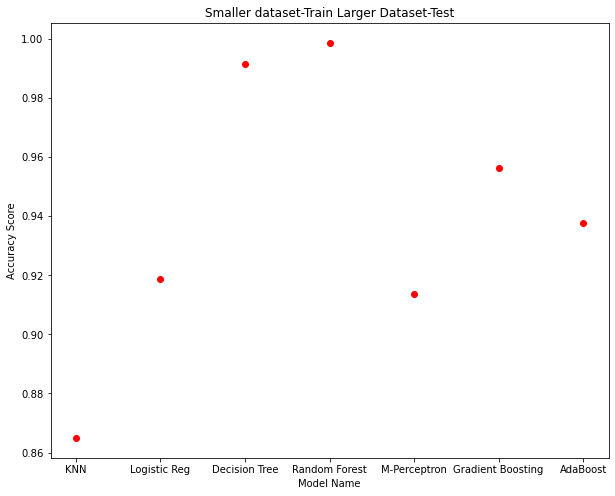

In [71]:
plt.figure(figsize=(10,8))
plt.title("Smaller dataset-Train Larger Dataset-Test")
plt.xlabel("Model Name")
plt.ylabel("Accuracy Score")
plt.plot(model, accuracy, "or")